In [1]:
import pandas as pd

data = pd.read_csv("../data/ohe_customer_dataset.csv", sep=",") 

data

,transactionFailed,fraudulent,"orderAmount_(9.999, 18.4]","orderAmount_(18.4, 30.0]","orderAmount_(30.0, 39.0]","orderAmount_(39.0, 47.0]","orderAmount_(47.0, 353.0]",orderAmount_desconocido,orderState_failed,orderState_fulfilled,...,emailDomain_com,emailDomain_info,emailDomain_net,emailDomain_org,emailDomain_weird,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_letters,sameCity_no,sameCity_unknown,sameCity_yes
0,False,0,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
1,False,1,False,True,False,False,False,False,False,True,...,True,False,False,False,False,False,True,True,False,False
2,False,0,False,False,False,True,False,False,False,True,...,True,False,False,False,False,True,False,True,False,False
3,False,0,False,True,False,False,False,False,False,True,...,True,False,False,False,False,True,False,True,False,False
4,True,1,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,True,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
619,True,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
620,False,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False
621,False,2,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,True,False


In [2]:
from funpymodeling import status

filter_data = data[["orderState_failed",
                    "orderState_fulfilled", 
                    "orderState_pending", 
                    "transactionFailed", 
                    "fraudulent", 
                    "customerIPAddressSimplified_digits_and_letters"]].copy()

status(filter_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderState_failed,0,0.0,573,0.919743,2,bool
1,orderState_fulfilled,0,0.0,223,0.357945,2,bool
2,orderState_pending,0,0.0,595,0.955056,2,bool
3,transactionFailed,0,0.0,455,0.730337,2,bool
4,fraudulent,0,0.0,107,0.171750,3,int64
5,customerIPAddressSimplified_digits_and_letters,0,0.0,546,0.876404,2,bool


# 4) Clustering con K-MEANS

### 4.2) Creacion del modelo

Establecemos los parametros de trabajo del modelo de cluster:

In [4]:
from sklearn.cluster import KMeans

cluster_model = KMeans(
    n_clusters=3,
    init='k-means++',
    max_iter=100,
    random_state=0,
    n_init='auto'
)

cluster_model.fit(filter_data)

KMeans(max_iter=100, n_clusters=3, random_state=0)

Usamos el modelo creado anteriormente para predecir los clusters, le pasamos como argumento el dataframe 'filter_data' que tiene una selección de seis variables:

In [6]:
prediccion_cluster = cluster_model.predict(filter_data)

#Vemos los clusters para cada registro
prediccion_cluster

array([1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,

In [8]:
variable_cluster = 'cluster'
x_data_cluster = filter_data.copy()
x_data_cluster[variable_cluster] = cluster_model.predict(filter_data)

In [9]:
x_data_cluster.head()

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,False,False,True,False,0,False,1
1,False,True,False,False,1,False,0
2,False,True,False,False,0,True,1
3,False,True,False,False,0,True,1
4,False,True,False,True,1,False,2


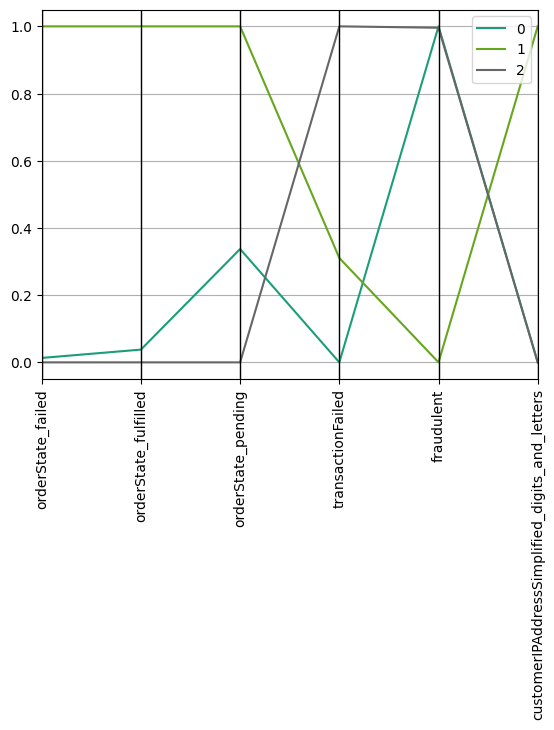

In [10]:
from funpymodeling.model_validation import coord_plot

d_orig, d_transf = coord_plot(x_data_cluster, variable_cluster)

### 4.4) Insights del grafico:

-- insertar insights --

### Bonus: Scatter 3D

In [11]:
!pip install plotly

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 840.2 kB/s eta 0:00:23
   - -------------------------------------- 0.5/19.1 MB 840.2 kB/s eta 0:00:23
   - -------------------------------------- 0.8/19.1 MB 799.2 kB/s eta 0:00:23
   -- ------------------------------------- 1.0/19.1 MB 868.0 kB/s eta 0:00:21
   -- ------------------------------------- 1.3/19.1 MB 945.5 kB/s eta 0:00:19
   --- ------------------------------------ 1.6/19.1 MB 999.0 kB/s eta 0:00:18
   ---- ----------------------------------- 2.1/19.1 MB 1.1 MB/s eta 0:00:17
   ---- ----------------------------------- 2.1/19.1 MB 1.1 MB/s eta 0:00:17
   ---- --------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import plotly.express as px

fig = px.scatter_3d(x_data_cluster, 
                    x='orderState_failed', 
                    y='customerIPAddressSimplified_digits_and_letters', 
                    z='transactionFailed', 
                    color='fraudulent')

fig.show()

# 5) Clustering con HDBSCAN

In [15]:
!pip install fast_hdbscan

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 429.7 kB/s eta 0:00:06
   ------- -------------------------------- 0.5/2.7 MB 429.7 kB/s eta 0:00:06
   ----------- ---------------------------- 0.8/2.7 MB 466.0 kB/s eta 0:00:05
   --------------- ------------------------ 1.0/2.7 MB 591.7 kB/s eta 0:00:03
   --------------- ------------------------ 1.0/2.7 MB 591.7 kB/s eta 0:00:03
   ------------------- -------------------- 1.3/2.7 MB 627.1 kB/s eta 0:00:03
   ------------------- -------------------- 1.3/2.7 MB 627.1 kB/s eta 0:00:03
   ----------------------- ---------------- 1.6/2.7 MB 586.5 kB/s eta 0:00:02
   ----------------------- ----


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import fast_hdbscan
# Ese 15 significa que cada cluster va a tener como mínimo 15 casos
model_hdb = fast_hdbscan.HDBSCAN(min_cluster_size=15).fit(filter_data)

In [18]:
from funpymodeling import freq_tbl
freq_tbl(model_hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,2,196,0.314607,0.314607
1,7,106,0.170144,0.484751
2,-1,83,0.133226,0.617978
3,1,67,0.107544,0.725522
4,0,43,0.069021,0.794543
5,5,36,0.057785,0.852327
6,6,27,0.043339,0.895666
7,8,26,0.041734,0.9374
8,4,23,0.036918,0.974318
9,3,16,0.025682,1.0


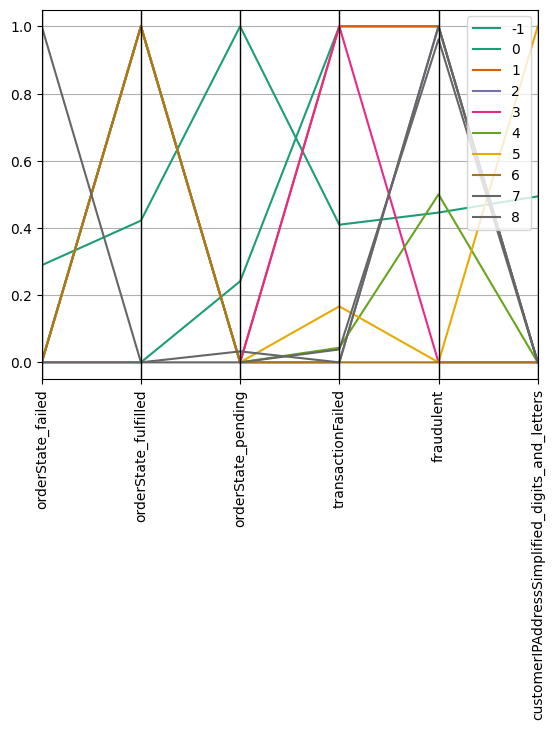

In [20]:
cluster_var = 'cluster'

x_data_cluster_2 = filter_data.copy()
x_data_cluster_2[cluster_var] = model_hdb.labels_

d_orig_2, d_transf_2 = coord_plot(x_data_cluster_2, cluster_var)

Insights:
